# Visualizing Neural Networks

Often while working with Artificial Neural Networks or other variations like Convolution Neural Networks or Recurrent Neural Networks, we want to visualize and create a diagrammatic representation of our compiled model. This can solve two purposes:

- While defining and training multiple models allows us to visualize the depth of our model and compare different layers and how they are sequentially laid down.<br>
- Allows better understanding of the model structure, activation functions used in each layer, shape of each layer (number of neurons), and parameters that need to be trained<br>

There are a few packages readily available in python that can create a visual representation of our Neural Network Models. The first three packages can be used even before a model is trained (the model needs to be defined and compiled only); however, Tensor Boards requires the user to train the model on accurate data before the architecture can be visualized.

## First of all download the required dependencies

In [ ]:
%pip install visualkeras
%pip install ann_visualizer
%pip install graphviz

#We don’t need to install the “Tensor Board” and “Keras Model Plot” separately. This will come with the initial installation of Tensorflow & Keras.

## Setting up the packages

We may utilize only a few of the libraries listed below. Most libraries can convert a TensorFlow model to a diagram without explicitly training it on data. You can consider this as a single source of truth. Some libraries, like Pandas, Skimage, and OpenCV, will come in handy when reading structured data or images.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import skimage library (data - Test images and example data.
#io - Reading, saving, and displaying images.)
from skimage import data, io   

from skimage.color import rgb2gray

# Import matplotlib.pyplot (Plotting framework in Python.)
import matplotlib.pyplot as plt                  
%matplotlib inline

# This module provides a portable way of using operating system dependent functionality.
import os                                        
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"  #For graphviz

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

import cv2 as cv

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


## Setting up a CNN

We will be defining three different CNN models with different hyperparameters. Ideally, in the real world, we aim at implementing different architectures to maximize accuracy or any relevant metrics, considering we are building the model for a multi-category classification task. Our choice of problem type won’t have any impact on how to put the visualization packages to use.<br>
<br>
We created user-defined functions to build three different models separately with a different number of CNN layers, max-pooling, and dense layers.

### Architecture 1 — Shallow CNN layers + ANN layers

In [2]:
def construct_model():
    #Defining the model in a sequential way.
    model = Sequential()
    #Adding convolutional Layers.
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    #Adding a Max-Pooling layer for reducing parameters.
    model.add(MaxPool2D((2, 2)))
    #Flatten
    model.add(Flatten())
    #Adding the final layers for computation
    model.add(Dense(256, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    #Setting/Compiling the model for trainig.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

### Architecture 2 — Deep CNN + Shallow ANN Layers

In [3]:
def sconstruct_model():
    #Defining the model in a sequential way.
    smodel = Sequential()
    #Adding convolutional Layers.
    smodel.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
    smodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    #Adding a Max-Pooling layer for reducing parameters.
    smodel.add(MaxPool2D((2, 2)))
    #Adding convolutional Layers.
    smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    #Adding a Max-Pooling layer for reducing parameters.
    smodel.add(MaxPool2D((2, 2)))
    #Adding convolutional Layers.
    smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    smodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    #Adding a Max-Pooling layer for reducing parameters.
    smodel.add(MaxPool2D((2, 2)))
    #Flatten Layer
    smodel.add(Flatten())
    #Dense Layer
    smodel.add(Dense(256, activation='relu'))
    smodel.add(Dense(12, activation='softmax'))
    #optimizer = Adam(lr=0.001)
    smodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    smodel.summary()
    return smodel

### Architecture 3 — Deep CNN & ANN Layers

In [4]:
def cconstruct_model(learningRate):
    #Defining the model in a sequential way.
    cmodel = Sequential()
    #Adding convolutional Layers.
    cmodel.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
    cmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
     #Adding a Max-Pooling layer for reducing parameters.
    cmodel.add(MaxPool2D((2, 2)))
    #Adding convolutional Layers.
    cmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    cmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
     #Adding a Max-Pooling layer for reducing parameters.
    cmodel.add(MaxPool2D((2, 2)))
    #Adding convolutional Layers.
    cmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    cmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
     #Adding a Max-Pooling layer for reducing parameters.
    cmodel.add(MaxPool2D((2, 2)))
    #Add Flatten layer
    cmodel.add(Flatten())
    #Adding the dense layers
    cmodel.add(Dense(256, activation='relu'))
    cmodel.add(Dense(256, activation='relu'))
    cmodel.add(Dense(12, activation='softmax'))
    #Setting up adam
    optimizer = Adam(lr=learningRate)
    #Compiling
    cmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    cmodel.summary()
    return cmodel

## Visualization unsing ANN Visualizer

A Python module named ANN Visualizer makes it possible to visualize an artificial neural network with a few lines of code.It uses Keras and Python’s Graphviz module to produce a tidy and appealing neural network graph. You have the flexibility to visualize the entire Deep Learning Network or just the Convolutional Neural Network you have created driven by advances in deep learning<br>
<br>
Use the following structure below to generate a pdf representation of your neural network. However, before that, we need to compile the above models.

In [5]:
#Shallow CNN layers + ANN layers
model=construct_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               62980352  
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                        

The Code syntax is as follows<br>
ann_viz(model, view=True, filename="network.gv", title="MyNeural Network")<br>
- model — Sequential Model from Keras
- view — Visualize the graph after the ann_viz() has been called
- filename — Name of the file
- title — Any specific title to denote the graph

In [10]:
from ann_visualizer.visualize import ann_viz
import graphviz

ann_viz(model, view=True, filename="construct_model.gv", title="CNN — Model 1 — Simple Architecture")

After this a pdf and a .Gv file would be made to the directory having the Visualizations<br>
in case of any graphviz issues install a new dependency<br>
in any case of path based issue,add the bin folder to the grahviz to the environmental variables<br>

In [ ]:
#Still if it cant find graphviz use this approach using OS.
import os                                        
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"  #Set your bin file accordingly.

## Visualization using Visual Keras

A Python tool called Visualkeras makes it easier to see Keras neural network designs (either separately or as part of TensorFlow). The majority of styling needs can be met with ease. Convolutional neural networks (CNNs) benefit significantly from developing layered-style architectures. Most models, including simple feed-forward networks, benefit greatly from the generation of graph-style architecture, which this module supports.

In [15]:
model1=construct_model()
model2=sconstruct_model()
model3=cconstruct_model(0.009)
import visualkeras
from PIL import ImageFont

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      640       
                                                                 
 conv2d_17 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_9 (Dense)             (None, 256)               62980352  
                                                                 
 dense_10 (Dense)            (None, 12)                3084      
                                                      

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_25 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 29, 29, 64)       0         
 g2D)                                                 

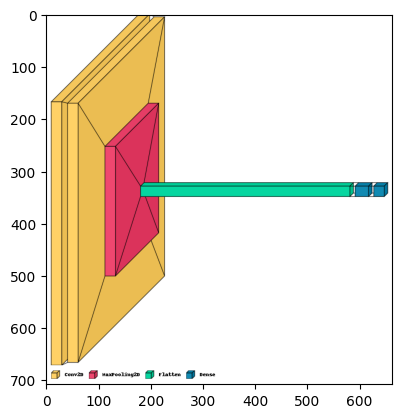

In [28]:
layered_model=visualkeras.layered_view(model1, legend=True)
layered_model.save('model1.png')
plt.imshow(plt.imread('model1.png'))

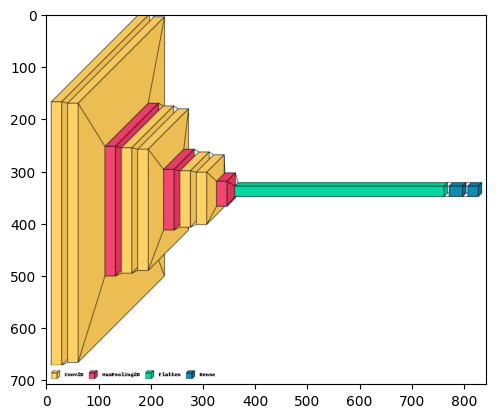

In [29]:
layered_model=visualkeras.layered_view(model2, legend=True)
layered_model.save('model2.png')
plt.imshow(plt.imread('model2.png'))

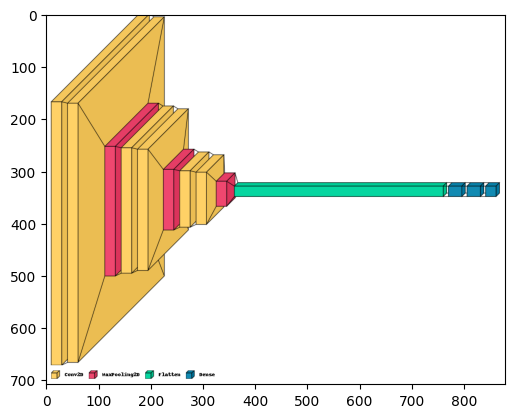

In [30]:
layered_model=visualkeras.layered_view(model3, legend=True)
layered_model.save('model3.png')
plt.imshow(plt.imread('model3.png'))

## Keras Model Plot

The keras.utils.plot_model provides inbuilt functions to plot a model defined and compiled through Keras using Graphviz and pydot packages. Graphically it is less intuitive than the packages used above, but it outlines the basic architecture of a sequential model.



In [43]:
keras.utils.plot_model(model1, to_file='./model_keras.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Few hyperparameters to consider:
<br>
- model: An instance of Keras compiled model or model object
- to_file: File Name of the image
- show_shapes: display dimension and shape of each layer in the neural network
- show_layer_activation: display activation functions used within the Neurons